In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd drive/MyDrive/3team_production

/content/drive/MyDrive/3team_production


In [3]:
ls

dezato2.ipynb              tyuka_photos-model.hdf5
dezato2_photos_64.npz      tyuuka2.ipynb
dezato2_photos-model.hdf5  wasyoku1.ipynb
dezato.ipynb               wasyoku1_photos_64.npz
dezato_photos_64.npz       wasyoku2.ipynb
dezato_photos-model.hdf5   wasyoku2_photos_64.npz
image/                     wasyoku2_photos-model.hdf5
itarian.ipynb              wasyoku.ipynb
itarian_photos_64.npz      wasyoku_photos_64.npz
itarian_photos-model.hdf5  wasyoku_photos-model.hdf5
tyuka2_photos_64.npz       yousyoku.ipynb
tyuka2_photos-model.hdf5   yousyoku_photos_64.npz
tyuka.ipynb                yousyoku_photos-model.hdf5
tyuka_photos_64.npz


In [4]:

#洋食
import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten
from keras.layers import Conv2D,MaxPooling2D
from keras.optimizers import RMSprop

def def_model(in_shape,nb_classes):
    model=Sequential()
    model.add(Conv2D(32,kernel_size=(3,3),activation="relu",input_shape=in_shape))
    model.add(Conv2D(32,kernel_size=(3,3),activation="relu"))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.5))

    model.add(Conv2D(64,kernel_size=(3,3),activation="relu"))
    #model.add(Conv2D(64,kernel_size=(3,3),activation="relu"))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.5))

    model.add(Flatten())
    model.add(Dense(512,activation="relu"))
    model.add(Dropout(0.5))
    model.add(Dense(nb_classes,activation="softmax"))
    return model

def get_model(in_shape,nb_classes):
    model=def_model(in_shape,nb_classes)
    model.compile(loss='categorical_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])
    return model


水増し前= 810
水増し後= 11340
Epoch 1/40
12/12 [==============================] - 14s 236ms/step - loss: 2.4539 - accuracy: 0.1733 - val_loss: 2.1733 - val_accuracy: 0.1000
Epoch 2/40
12/12 [==============================] - 2s 191ms/step - loss: 2.0584 - accuracy: 0.2513 - val_loss: 2.0159 - val_accuracy: 0.3222
Epoch 3/40
12/12 [==============================] - 2s 191ms/step - loss: 1.9888 - accuracy: 0.2964 - val_loss: 1.9561 - val_accuracy: 0.2667
Epoch 4/40
12/12 [==============================] - 2s 190ms/step - loss: 1.8299 - accuracy: 0.3548 - val_loss: 1.9151 - val_accuracy: 0.2778
Epoch 5/40
12/12 [==============================] - 2s 192ms/step - loss: 1.7782 - accuracy: 0.3701 - val_loss: 1.7741 - val_accuracy: 0.3444
Epoch 6/40
12/12 [==============================] - 2s 192ms/step - loss: 1.6783 - accuracy: 0.4053 - val_loss: 1.7025 - val_accuracy: 0.4000
Epoch 7/40
12/12 [==============================] - 2s 192ms/step - loss: 1.5648 - accuracy: 0.4502 - val_loss: 1.8461 - val_

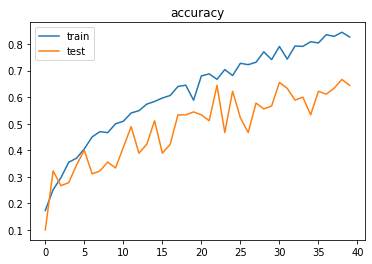

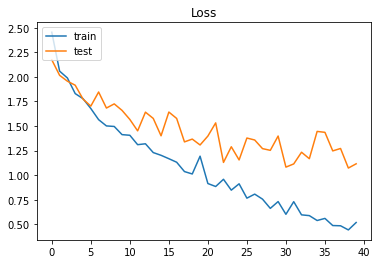

In [5]:
#import cnn_model
import keras
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import cv2
im_rows=64 #変更
im_cols=64 #変更
im_color=3
in_shape=(im_rows,im_cols,im_color)

photos=np.load('wasyoku1_photos_64.npz')
nb_classes=9 #数で変更

x=photos['x']
y=photos['y']

x=x.reshape(-1,im_rows,im_cols,im_color)
x=x.astype('float32')/255
y=keras.utils.to_categorical(y.astype('int32'),nb_classes)
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.9)
x_new=[]
y_new=[]
for i,xi in enumerate(x_train):
  yi=y_train[i]
  for ang in range(-30,40,10):
    center=(16,16)
    mtx=cv2.getRotationMatrix2D(center,ang,1.0)
    xi2=cv2.warpAffine(xi,mtx,(64,64))
    x_new.append(xi2)
    y_new.append(yi)
    xi3=cv2.flip(xi2,1)
    x_new.append(xi3)
    y_new.append(yi)
print('水増し前=',len(y_train))
x_train=np.array(x_new)
y_train=np.array(y_new)
print("水増し後=",len(y_train))

# model=cnn_model.get_model(in_shape,nb_classes)
model=get_model(in_shape,nb_classes)

hist=model.fit(x_train,y_train,batch_size=1024,epochs=40,verbose=1,validation_data=(x_test,y_test))
score=model.evaluate(x_test,y_test,verbose=1)
print("正解率=",score[1],"loss=",score[0])
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('accuracy')
plt.legend(['train','test'],loc='upper left')
plt.show()

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss')
plt.legend(['train','test'],loc='upper left')
plt.show()

model.save_weights('wasyoku1_photos-model.hdf5')


In [6]:
# import cnn_model
import keras
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

im_rows=64 #変更
im_cols=64 #変更
im_color=3
in_shape=(im_rows,im_cols,im_color)
nb_classes=9

Labels=["白米","海鮮丼","カレー","かつ丼","味噌汁","お茶漬け","親子丼","寿司","うな重"]
Calories=[168,158,127,183,18,76,146,151,213]#記入

model=get_model(in_shape,nb_classes)
# model=cnn_model.get_model(in_shape,nb_classes)
model.load_weights('wasyoku1_photos-model.hdf5')

def check_photo(path):
    img=Image.open(path)
    img=img.convert("RGB")
    img=img.resize((im_cols,im_rows))
    plt.show()
    x=np.asarray(img)
    x=x.reshape(-1,im_rows,im_cols,im_color)
    x=x/255

    pre=model.predict([x])[0]
    idx=pre.argmax()
    per=int(pre[idx]*100)
    return (idx,per)
def check_photo_str(path):
    idx,per=check_photo(path)
    print("この写真は、",Labels[idx],"で、カロリーは",Calories[idx],"kcal")
    print("可能性は、",per,"%")
if __name__=='__main__':
    check_photo_str('image/wasyoku1/unazyu.jpg')
    check_photo_str('image/wasyoku1/susi.jpg')
    check_photo_str('image/wasyoku1/oyakodon.jpg')
    check_photo_str('image/wasyoku1/otyazuke.jpg')
    check_photo_str('image/wasyoku1/misosiru.jpg')
    check_photo_str('image/wasyoku1/katudon.jpg')
    check_photo_str('image/wasyoku1/kare-.jpg')
    check_photo_str('image/wasyoku1/kaisendon.jpg')
    check_photo_str('image/wasyoku1/hakumai.jpg')


1/1 [==============================] - 0s 159ms/step
この写真は、 うな重 で、カロリーは 213 kcal
可能性は、 99 %
1/1 [==============================] - 0s 18ms/step
この写真は、 寿司 で、カロリーは 151 kcal
可能性は、 98 %
1/1 [==============================] - 0s 14ms/step
この写真は、 親子丼 で、カロリーは 146 kcal
可能性は、 64 %
1/1 [==============================] - 0s 14ms/step
この写真は、 お茶漬け で、カロリーは 76 kcal
可能性は、 82 %
1/1 [==============================] - 0s 20ms/step
この写真は、 味噌汁 で、カロリーは 18 kcal
可能性は、 99 %
1/1 [==============================] - 0s 17ms/step
この写真は、 かつ丼 で、カロリーは 183 kcal
可能性は、 80 %
1/1 [==============================] - 0s 15ms/step
この写真は、 カレー で、カロリーは 127 kcal
可能性は、 70 %
1/1 [==============================] - 0s 15ms/step
この写真は、 海鮮丼 で、カロリーは 158 kcal
可能性は、 93 %
1/1 [==============================] - 0s 15ms/step
この写真は、 白米 で、カロリーは 168 kcal
可能性は、 98 %
